In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Suryaditya\Desktop\AnalytixLabs\TSF\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import pandas_profiling 
pandas_profiling.ProfileReport(df)

#### As per the profile Report above, PetalWidthCm is highly correlated with PetalLengthCm. But we will not remove the data for now since the number of columns are very less here.

In [4]:
X = df[df.columns.difference(['Species'])]
y = df['Species']

In [5]:
# splitting the data with a 80-20 split :
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [6]:
# Running Decision Tree Classifier algoritm:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [7]:
# Predicting the scores for test data :
y_pred = dt.predict(X_test) 

In [8]:
# Actual Scores vs Predicted Scores :
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-versicolor
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


#### Visualizing :

In [9]:
import graphviz 
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("df")

'df.pdf'

#### The graphviz export of the above tree trained on the entire dataset has been created and the results are saved in an output file : df.pdf.
#### Alternately, it is also given below :

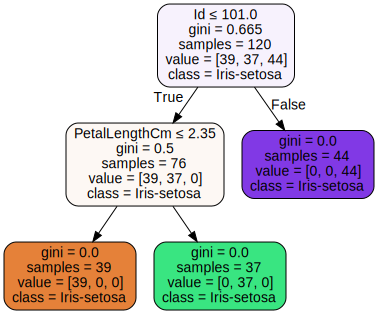

In [10]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=list(X.columns),  
                     class_names=df.Species,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 